In [12]:
from data import mnist, fashionMnist, cifar10
from networks import DynResNet, ResNet, ProjResNet
import optimisation
import time
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import torch
from torch.linalg import matrix_rank
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
N = 1500
V = 1500
k = 28
batch_size = 5
transform = 'none'

data_mnist = mnist(N, V, batch_size, k, transform) ## data object
data_fashionMnist = fashionMnist(N, V, batch_size, k, transform) ## data object
data_cifar = cifar10(N, V, batch_size, k, transform) ## data object

Data ready
Data ready
Files already downloaded and verified
Files already downloaded and verified
Data ready


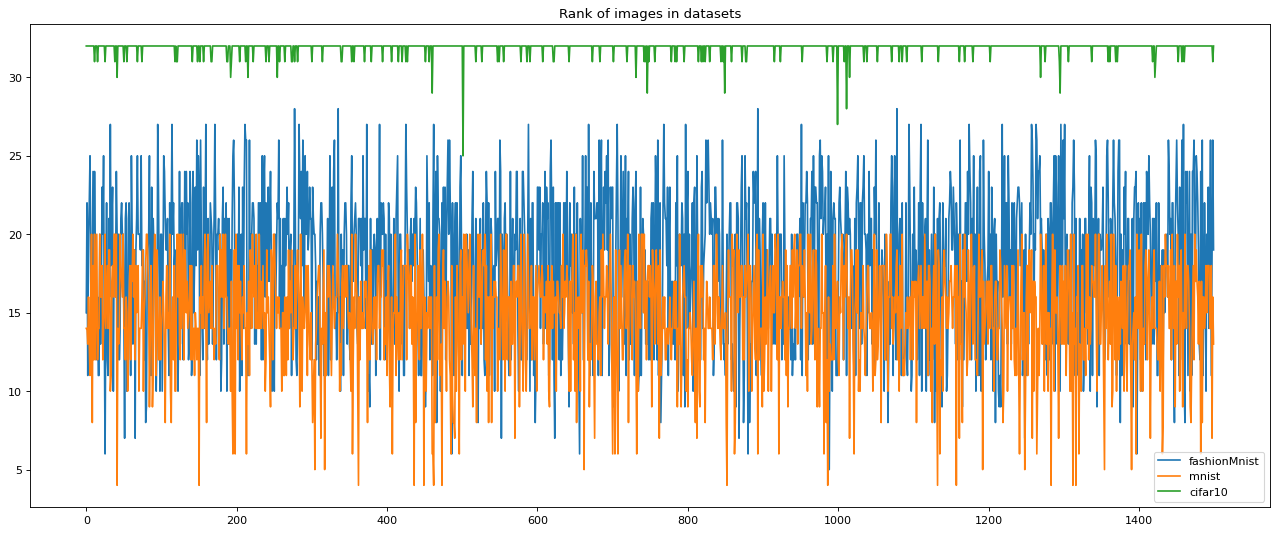

In [3]:
plt.figure(figsize=(20, 8), dpi=80)
data_sets = [ data_fashionMnist, data_mnist, data_cifar]
for data in data_sets: 
    name = str(type(data).__name__)
    data = data.all_data[0]
    n = data.shape[-1]
    data = data.unflatten(-1, (int(np.sqrt(n)),int(np.sqrt(n))))
    ranks = np.zeros(N)
    for i, image in enumerate(data): 
        
        ranks[i] = matrix_rank(image)
    plt.plot(ranks, label = name)
plt.title('Rank of images in datasets')
plt.legend()
plt.show()

## Training networks

Data ready
Data ready
Files already downloaded and verified
Files already downloaded and verified
Data ready
 ----- TRAINING ResNet with L = 10 ------ 
[1,   300] training loss: 0.795    gradient: 9.109
[2,   300] training loss: 0.345    gradient: 7.468
[3,   300] training loss: 0.186    gradient: 5.612
[4,   300] training loss: 0.099    gradient: 3.732
[5,   300] training loss: 0.108    gradient: 4.851
[6,   300] training loss: 0.086    gradient: 3.575
[7,   300] training loss: 0.067    gradient: 3.263
[8,   300] training loss: 0.048    gradient: 2.044
[9,   300] training loss: 0.029    gradient: 1.915
[10,   300] training loss: 0.029    gradient: 1.336
[11,   300] training loss: 0.001    gradient: 0.140
[12,   300] training loss: 0.000    gradient: 0.037
[13,   300] training loss: 0.000    gradient: 0.021
[14,   300] training loss: 0.000    gradient: 0.015
[15,   300] training loss: 0.000    gradient: 0.011
Finished Training
Training took  215.7651 seconds
 ----- TRAINING ResNet with

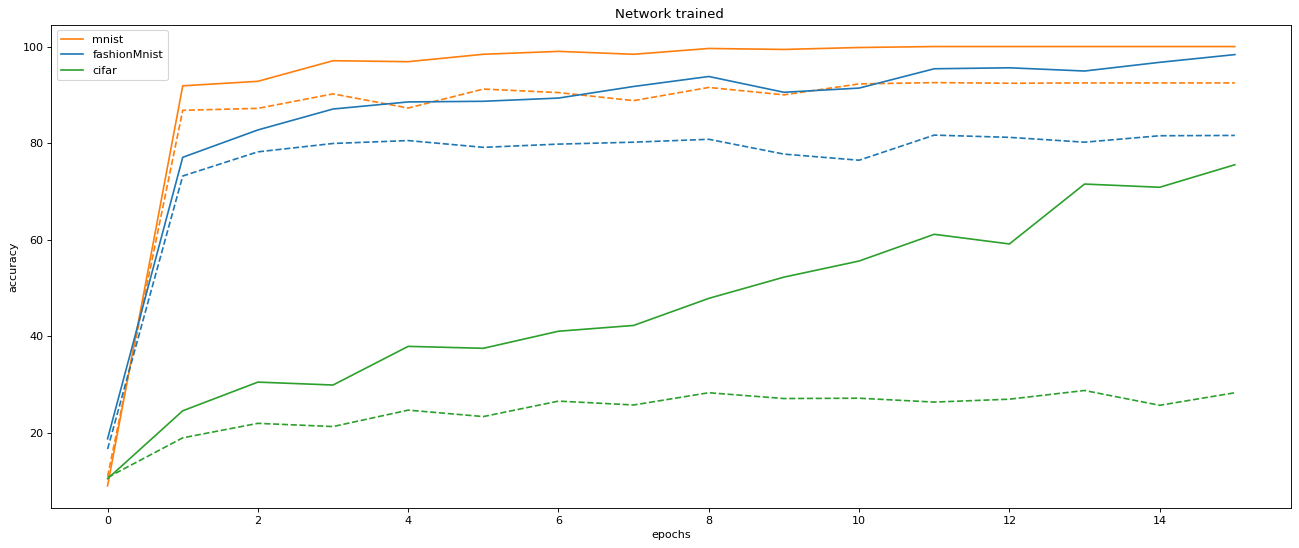

Best training accuracy:  100.0
Best validation accuracy:  92.53
Best training accuracy:  98.33
Best validation accuracy:  81.67
Best training accuracy:  75.53
Best validation accuracy:  28.8


In [5]:
N = 1500
V = 1500
k = 28
batch_size = 5
transform = 'none'

#depth of networks
L = 10

data_mnist = mnist(N, V, batch_size, k, transform) ## data object
data_fashionMnist = fashionMnist(N, V, batch_size, k, transform) ## data object
data_cifar = cifar10(N, V, batch_size, k, transform) ## data object

net_mnist = ResNet(data_mnist, L)
net_fashionMnist = ResNet(data_fashionMnist, L)
net_cifar = ResNet(data_cifar, L)

_, acc_train_mnist, _, acc_val_mnist = optimisation.train(net_mnist,  max_epochs = 15)
_, acc_train_fashionMnist, _, acc_val_fashionMnist = optimisation.train(net_fashionMnist,  max_epochs = 15)
_, acc_train_cifar, _, acc_val_cifar = optimisation.train(net_cifar,  max_epochs = 15)

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(acc_train_mnist, 'tab:orange', label = 'mnist')
plt.plot(acc_val_mnist, 'tab:orange',  linestyle='--')
plt.plot(acc_train_fashionMnist, 'tab:blue', label = 'fashionMnist' )
plt.plot(acc_val_fashionMnist, 'tab:blue',  linestyle='--')
plt.plot(acc_train_cifar, 'tab:green', label = 'cifar')
plt.plot(acc_val_cifar, 'tab:green', linestyle='--')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title(r'Network trained ')
plt.show()

print("Best training accuracy: ", round(max(acc_train_mnist), 2))
print("Best validation accuracy: ", round(max(acc_val_mnist), 2))

print("Best training accuracy: ", round(max(acc_train_fashionMnist), 2))
print("Best validation accuracy: ", round(max(acc_val_fashionMnist), 2))

print("Best training accuracy: ", round(max(acc_train_cifar), 2))
print("Best validation accuracy: ", round(max(acc_val_cifar), 2))

Data ready
Data ready
Files already downloaded and verified
Files already downloaded and verified
Data ready
Network ready
Network ready
Network ready
 ----- TRAINING DynResNet with L = 10 ------ 
[1,   300] training loss: 1.185    gradient: 3.137
[2,   300] training loss: 0.587    gradient: 2.239
[3,   300] training loss: 0.456    gradient: 1.941
[4,   300] training loss: 0.389    gradient: 1.783
[5,   300] training loss: 0.344    gradient: 1.675
[6,   300] training loss: 0.307    gradient: 1.600
[7,   300] training loss: 0.280    gradient: 1.516
[8,   300] training loss: 0.260    gradient: 1.438
[9,   300] training loss: 0.239    gradient: 1.354
[10,   300] training loss: 0.226    gradient: 1.332
Finished Training
Training took  395.6564 seconds
 ----- TRAINING DynResNet with L = 10 ------ 
[1,   300] training loss: 1.110    gradient: 4.306
[2,   300] training loss: 0.746    gradient: 3.566
[3,   300] training loss: 0.643    gradient: 3.415
[4,   300] training loss: 0.596    gradient

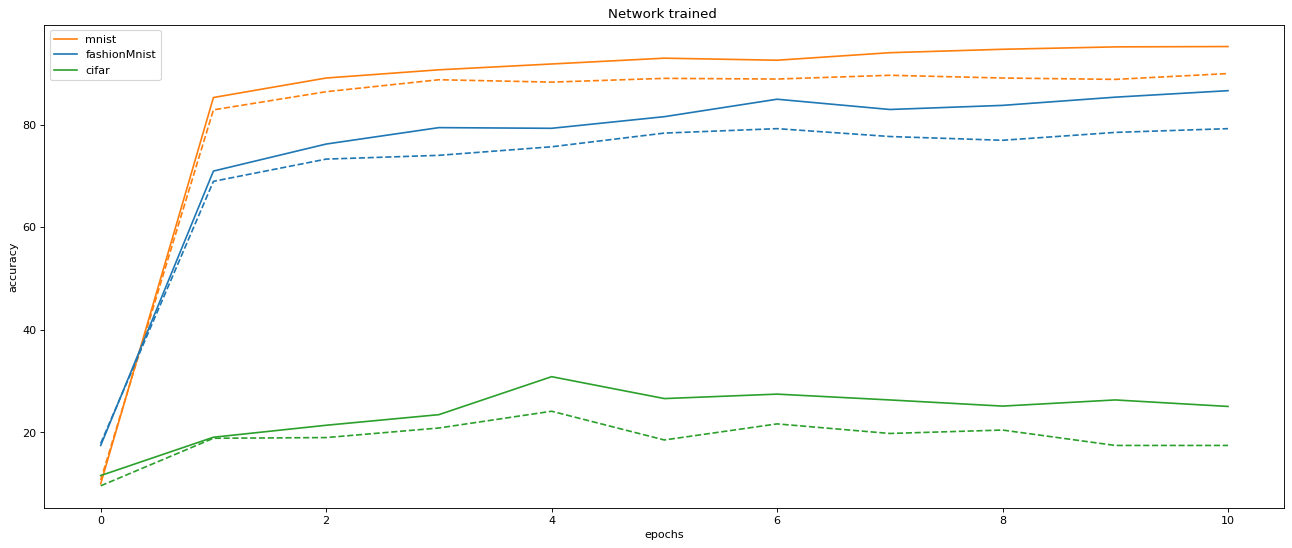

Mnist
Best training accuracy:  95.2
Best validation accuracy:  89.93
Fashion Mnist
Best training accuracy:  86.6
Best validation accuracy:  79.2
Grayscale cifar10
Best training accuracy:  30.87
Best validation accuracy:  24.13


In [7]:
N = 1500
V = 1500
k = 3
batch_size = 5
transform = 'svd'

#depth of networks
L = 10

data_mnist = mnist(N, V, batch_size, k, transform) ## data object
data_fashionMnist = fashionMnist(N, V, batch_size, k, transform) ## data object
data_cifar = cifar10(N, V, batch_size, k, transform) ## data object

net_mnist = DynResNet(data_mnist, L)
net_fashionMnist = DynResNet(data_fashionMnist, L)
net_cifar = DynResNet(data_cifar, L)

_, d_acc_train_mnist, _, d_acc_val_mnist = optimisation.train(net_mnist,  max_epochs = 10)
_, d_acc_train_fashionMnist, _, d_acc_val_fashionMnist = optimisation.train(net_fashionMnist,  max_epochs = 10)
_, d_acc_train_cifar, _, d_acc_val_cifar = optimisation.train(net_cifar,  max_epochs = 10)

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(d_acc_train_mnist, 'tab:orange', label = 'mnist')
plt.plot(d_acc_val_mnist, 'tab:orange',  linestyle='--')
plt.plot(d_acc_train_fashionMnist, 'tab:blue', label = 'fashionMnist' )
plt.plot(d_acc_val_fashionMnist, 'tab:blue',  linestyle='--')
plt.plot(d_acc_train_cifar, 'tab:green', label = 'cifar')
plt.plot(d_acc_val_cifar, 'tab:green', linestyle='--')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title(r'Network trained ')
plt.show()

print("Mnist")
print("Best training accuracy: ", round(max(d_acc_train_mnist), 2))
print("Best validation accuracy: ", round(max(d_acc_val_mnist), 2))

print("Fashion Mnist")
print("Best training accuracy: ", round(max(d_acc_train_fashionMnist), 2))
print("Best validation accuracy: ", round(max(d_acc_val_fashionMnist), 2))

print("Grayscale cifar10")
print("Best training accuracy: ", round(max(d_acc_train_cifar), 2))
print("Best validation accuracy: ", round(max(d_acc_val_cifar), 2))

## Easier to compare

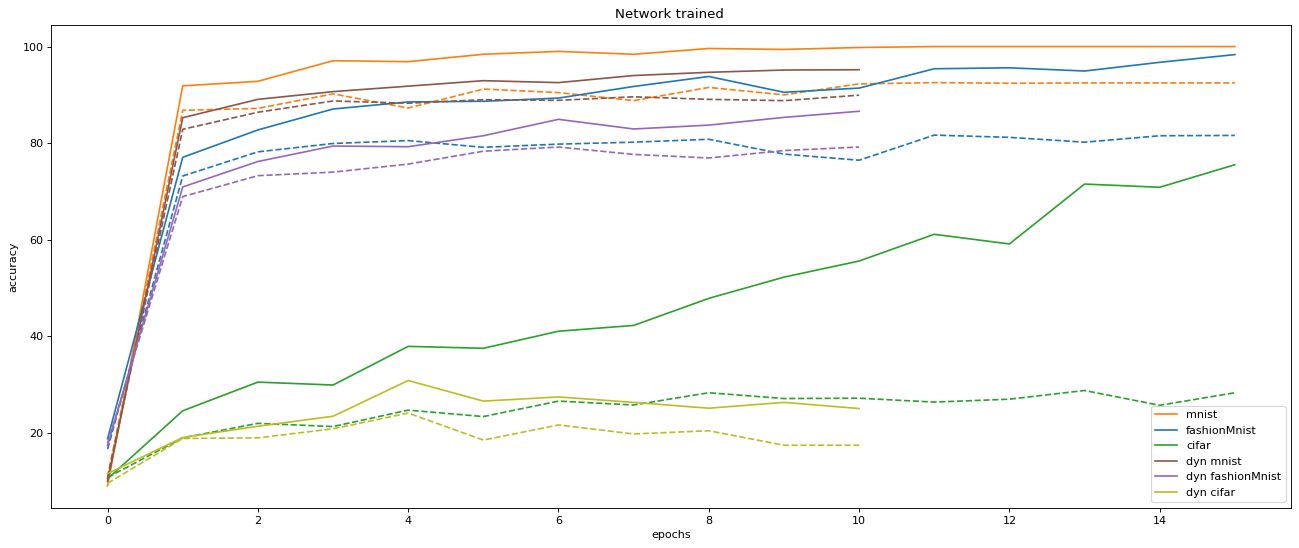

-- Mnist--
resnet
Best training accuracy:  100.0
Best validation accuracy:  92.53
dynamic low rank net
Best training accuracy:  95.2
Best validation accuracy:  89.93
-- Fashion Mnist--
resnet
Best training accuracy:  98.33
Best validation accuracy:  81.67
dynamic low rank net
Best training accuracy:  86.6
Best validation accuracy:  79.2
-- Grayscale cifar10--
resnet
Best training accuracy:  75.53
Best validation accuracy:  28.8
dynamic low rank net
Best training accuracy:  30.87
Best validation accuracy:  24.13


In [9]:
plt.figure(figsize=(20, 8), dpi=80)

plt.plot(acc_train_mnist, 'tab:orange', label = 'mnist')
plt.plot(acc_val_mnist, 'tab:orange',  linestyle='--')
plt.plot(acc_train_fashionMnist, 'tab:blue', label = 'fashionMnist' )
plt.plot(acc_val_fashionMnist, 'tab:blue',  linestyle='--')
plt.plot(acc_train_cifar, 'tab:green', label = 'cifar')
plt.plot(acc_val_cifar, 'tab:green', linestyle='--')

plt.plot(d_acc_train_mnist, 'tab:brown', label = 'dyn mnist')
plt.plot(d_acc_val_mnist, 'tab:brown',  linestyle='--')
plt.plot(d_acc_train_fashionMnist, 'tab:purple', label = 'dyn fashionMnist' )
plt.plot(d_acc_val_fashionMnist, 'tab:purple',  linestyle='--')
plt.plot(d_acc_train_cifar, 'tab:olive', label = 'dyn cifar')
plt.plot(d_acc_val_cifar, 'tab:olive', linestyle='--')

plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title(r'Network trained ')
plt.show()


print("-- Mnist--")
print('resnet')
print("Best training accuracy: ", round(max(acc_train_mnist), 2))
print("Best validation accuracy: ", round(max(acc_val_mnist), 2))
print('dynamic low rank net')
print("Best training accuracy: ", round(max(d_acc_train_mnist), 2))
print("Best validation accuracy: ", round(max(d_acc_val_mnist), 2))

print("-- Fashion Mnist--")
print('resnet')
print("Best training accuracy: ", round(max(acc_train_fashionMnist), 2))
print("Best validation accuracy: ", round(max(acc_val_fashionMnist), 2))
print('dynamic low rank net')
print("Best training accuracy: ", round(max(d_acc_train_fashionMnist), 2))
print("Best validation accuracy: ", round(max(d_acc_val_fashionMnist), 2))

print("-- Grayscale cifar10--")
print('resnet')
print("Best training accuracy: ", round(max(acc_train_cifar), 2))
print("Best validation accuracy: ", round(max(acc_val_cifar), 2))
print('dynamic low rank net')
print("Best training accuracy: ", round(max(d_acc_train_cifar), 2))
print("Best validation accuracy: ", round(max(d_acc_val_cifar), 2))




